In [1]:
import json

def count_types(filename, encoding='utf-8'):  
    """
    Reads datasets/MMSQL_train.json file and counts the number of different types in the 'turn' field of each item.
    """

    type_counts = {}
    with open(filename, 'r', encoding=encoding) as f:  
        data = json.load(f)
        for item in data:
            for turn in item['turns']:
                type_ = turn.get('type')
                if type_ in type_counts:
                    type_counts[type_] += 1
                else:
                    type_counts[type_] = 1

    return type_counts


filename = 'datasets/MMSQL_train.json'
type_counts = count_types(filename, encoding='utf-8')  
print(type_counts)


{'answerable': 12342, None: 38633, 'improper': 11742, 'ambiguous': 5754, 'unanswerable': 8828}


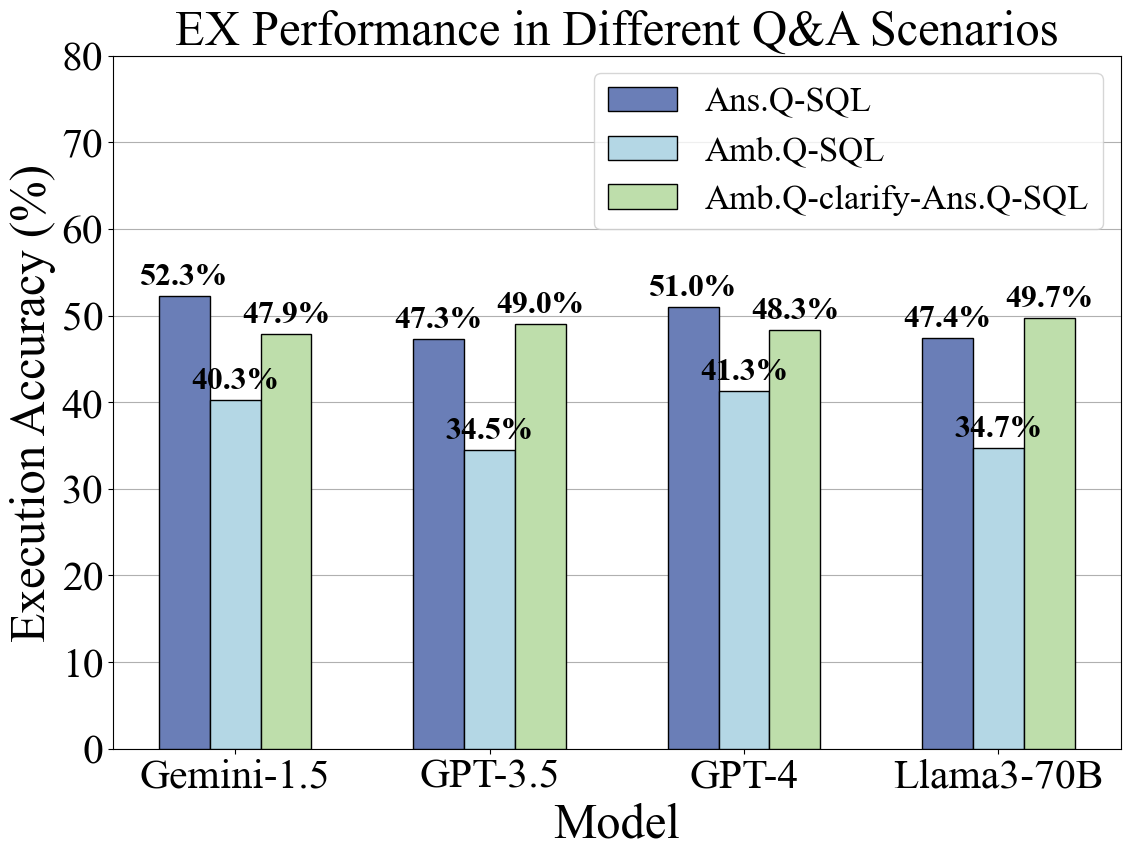

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [ 'Gemini-1.5', 'GPT-3.5', 'GPT-4', 'Llama3-70B']

# Question Match data
# Each model has three data points: Ans.Q, Amb.Q+ans, Amb.Q+clarify+ans
scores = {
    'GPT-4': [51.0, 41.3, 48.3],
    'GPT-3.5': [47.3, 34.5, 49.0],
    'Gemini-1.5': [52.3, 40.3, 47.9],
    'Llama3-70B': [47.4, 34.7, 49.7],
}

# Set font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30  # Increase font size

# Plot the chart
fig, ax = plt.subplots(figsize=(13, 9))

# Set the width and positions of the bars
bar_width = 0.2
index = np.arange(len(models))

# Get the data for each category
ans_q = [scores[model][0] for model in models]
amb_q_ans = [scores[model][1] for model in models]
amb_q_clarify_ans = [scores[model][2] for model in models]

# Plot the bars for each category
bars1 = ax.bar(index, ans_q, bar_width, label='Ans.Q-SQL', color='#6a7eb7', edgecolor='black', zorder=100)
bars2 = ax.bar(index + bar_width, amb_q_ans, bar_width, label='Amb.Q-SQL', color='#b4d7e5', edgecolor='black', zorder=100)
bars3 = ax.bar(index + 2 * bar_width, amb_q_clarify_ans, bar_width, label='Amb.Q-clarify-Ans.Q-SQL', color='#bedeab', edgecolor='black', zorder=100)

# Add text above the bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=23, fontweight='bold', zorder=100)

# Set axis labels and title
ax.set_xlabel('Model', fontsize=35)
ax.set_ylabel('Execution Accuracy (%)', fontsize=35)
ax.set_title('EX Performance in Different Q&A Scenarios', fontsize=35)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models, fontsize=30)

# Adjust y-axis limit to make bars shorter
ax.set_ylim(0, 80)

# Place the legend inside the chart, in the upper right corner
ax.legend(fontsize=25, loc='upper right')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)


plt.savefig('plots/EX_Performance_in_Different_Scenarios.pdf', format='pdf', bbox_inches='tight')


# Show the chart
plt.show()


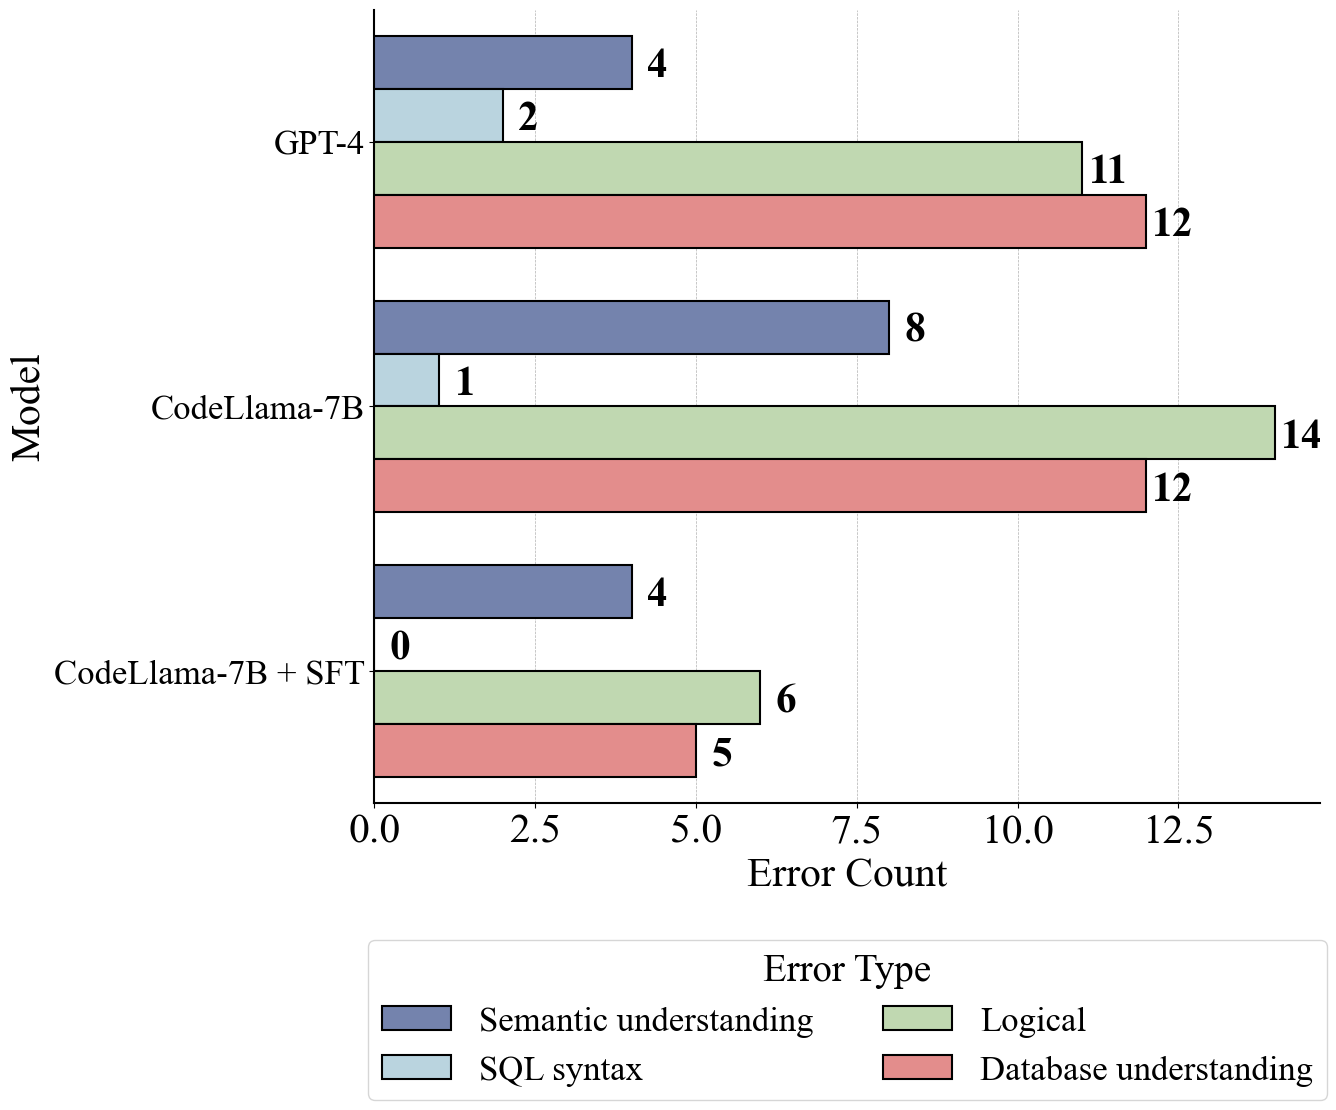

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create data
data = {
    'Error Type': ['Semantic understanding', 'SQL syntax', 'Logical', 'Database understanding'],
    'GPT-4': [4, 2, 11, 12],
    'CodeLlama-7B': [8, 1, 14, 12],
    'CodeLlama-7B + SFT': [4, 0, 6, 5]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert data to long format
df_melt = df.melt(id_vars='Error Type', var_name='Model', value_name='Error Count')

# Set color palette
palette = {
    'Semantic understanding': '#6a7eb7', 
    'SQL syntax': '#b4d7e5', 
    'Logical': '#bedeab',
    'Database understanding': '#f17f7e'
}

# Set font and size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30  # Increase font size

# Set figure size
plt.figure(figsize=(14, 12))  # Extend the chart vertically

# Draw bar plot
barplot = sns.barplot(data=df_melt, x='Error Count', y='Model', hue='Error Type', palette=palette, edgecolor='black', linewidth=1.5, zorder=10)

# Set title and labels

plt.xlabel('Error Count', fontsize=30)
plt.ylabel('Model', fontsize=30)

# Adjust legend and place it below the chart
plt.legend(title='Error Type', fontsize=25, title_fontsize=28, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

# Add border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Bold y-axis labels
plt.yticks(fontsize=25)

# Show only x-axis grid lines and place them at the bottom
plt.grid(True, axis='x', linestyle='--', linewidth=0.5, zorder=0)

# Annotate error counts on the bars
for i, bar in enumerate(barplot.patches):
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x() + width
    y = bar.get_y() + height / 1.7
    barplot.text(x + 0.4, y, '{:.0f}'.format(width), ha='center', va='center', color='black', fontweight='bold', fontsize=30)

# Show the chart
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('plots/ErrorAnalysis.pdf', format='pdf', bbox_inches='tight')

plt.show()


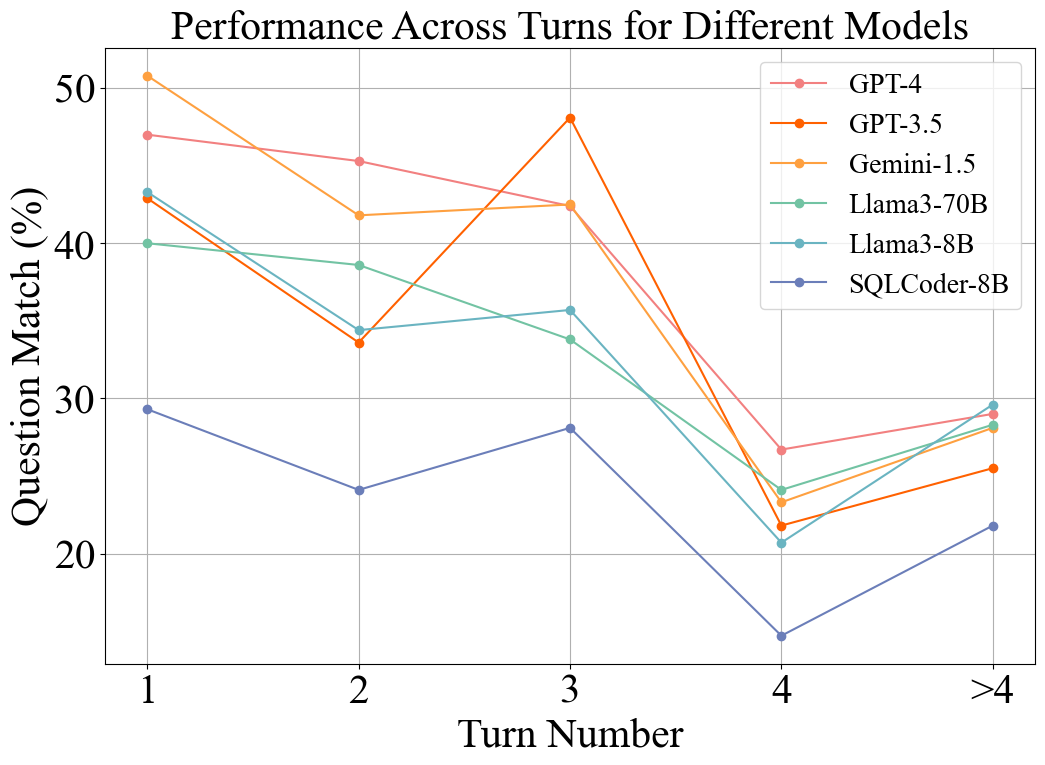

In [32]:
import matplotlib.pyplot as plt

models = ['SQLCoder-8B', 'Llama3-8B', 'Llama3-70B', 'Gemini-1.5', 'GPT-3.5', 'GPT-4']

turns = [1, 2, 3, 4,'>4']

scores = {
    'GPT-4': [47.0, 45.3, 42.4, 26.7, 29.0],
    'GPT-3.5': [42.9, 33.6, 48.1, 21.8, 25.5],
    'Gemini-1.5': [50.8, 41.8, 42.5, 23.3, 28.1],
    'Llama3-70B': [40.0, 38.6, 33.8, 24.1, 28.3],
    'Llama3-8B': [43.3, 34.4, 35.7, 20.7, 29.6],
    'SQLCoder-8B': [29.3, 24.1, 28.1, 14.7, 21.8]
}

colors = {
    'SQLCoder-8B': '#6B7EB9',  
    'Llama3-8B': '#6AB4C1', 
    'Llama3-70B': '#72C3A3', 
    'Gemini-1.5': '#FEA040',  
    'GPT-3.5': '#FF6100',      
    'GPT-4': '#F28080'       
}

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30

plt.figure(figsize=(12, 8))

for model, score in scores.items():
    plt.plot(turns, score, marker='o', label=model, color=colors[model])

plt.xlabel('Turn Number', fontsize=30)
plt.ylabel('Question Match (%)', fontsize=30)
plt.title('Performance Across Turns for Different Models', fontsize=30)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()


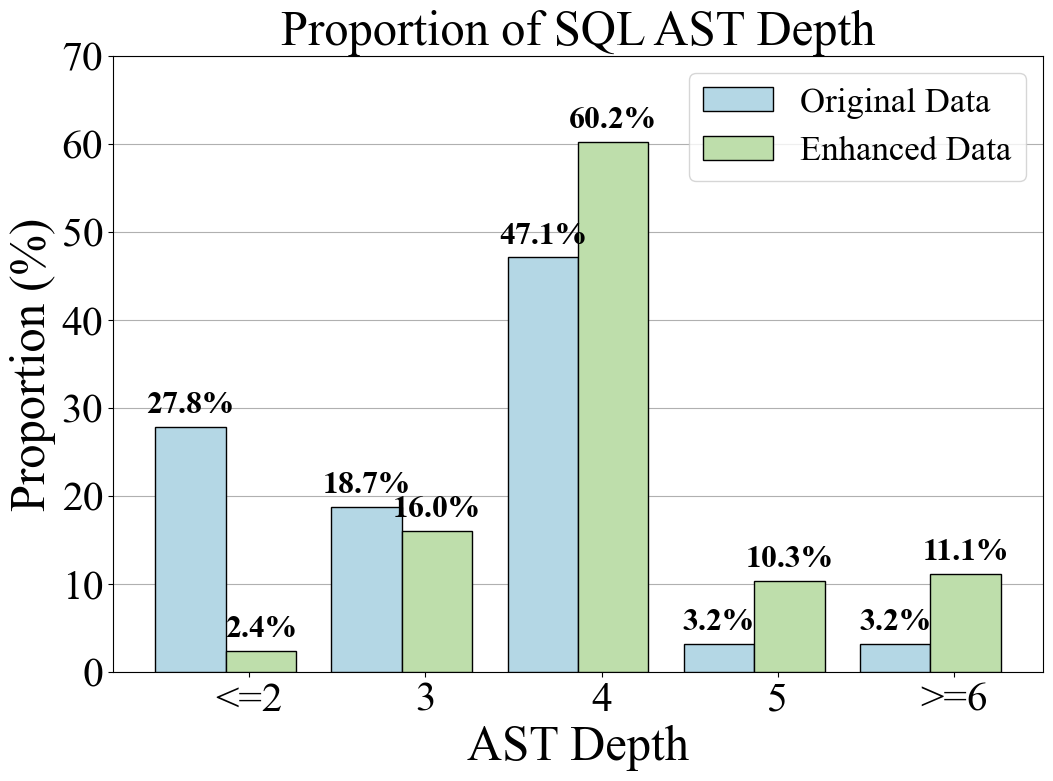

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['<=2', '3', '4', '5', '>=6']

# Question Match data
# Each model has three data points: Ans.Q, Amb.Q+ans, Amb.Q+clarify+ans
scores = {
    '<=2': [27.8, 2.4],
    '3': [18.7, 16.0],
    '4': [47.1, 60.2],
    '5': [3.2, 10.3],
    '>=6': [3.2, 11.1],
}

# Set font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30  # Increase font size

# Plot the chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width and positions of the bars
bar_width = 0.4  # Increase bar width
index = np.arange(len(models))

# Get the data for each category
amb_q_ans = [scores[model][0] for model in models]
amb_q_clarify_ans = [scores[model][1] for model in models]

# Plot the bars for each category
bars2 = ax.bar(index, amb_q_ans, bar_width, label='Original Data', color='#b4d7e5', edgecolor='black', zorder=100)
bars3 = ax.bar(index + bar_width, amb_q_clarify_ans, bar_width, label='Enhanced Data', color='#bedeab', edgecolor='black', zorder=100)

# Add text above the bars
for bars in [bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=23, fontweight='bold', zorder=100)

# Set axis labels and title
ax.set_xlabel('AST Depth', fontsize=35)
ax.set_ylabel('Proportion (%)', fontsize=35)
ax.set_title('Proportion of SQL AST Depth', fontsize=35)
ax.set_xticks(index + bar_width / 1.2)  # Adjust x-tick positions for wider bars 
ax.set_xticklabels(models, fontsize=30)

# Adjust y-axis limit to make bars shorter
ax.set_ylim(0, 70)

# Place the legend inside the chart, in the upper right corner
ax.legend(fontsize=25, loc='upper right')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)


plt.savefig('plots/ASTdepth.pdf', format='pdf', bbox_inches='tight')


# Show the chart
plt.show()


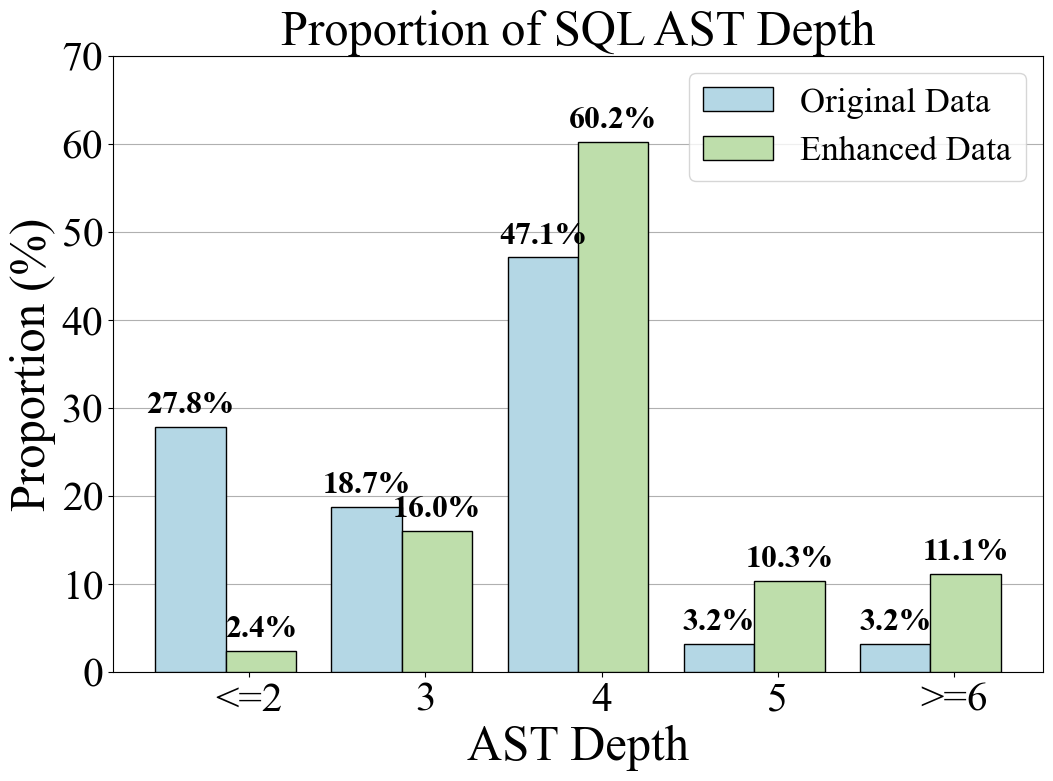

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['<=2', '3', '4', '5', '>=6']

# Question Match data
# Each model has three data points: Ans.Q, Amb.Q+ans, Amb.Q+clarify+ans
scores = {
    '<=2': [27.8, 2.4],
    '3': [18.7, 16.0],
    '4': [47.1, 60.2],
    '5': [3.2, 10.3],
    '>=6': [3.2, 11.1],
}

# Set font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30  # Increase font size

# Plot the chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width and positions of the bars
bar_width = 0.4  # Increase bar width
index = np.arange(len(models))

# Get the data for each category
amb_q_ans = [scores[model][0] for model in models]
amb_q_clarify_ans = [scores[model][1] for model in models]

# Plot the bars for each category
bars2 = ax.bar(index, amb_q_ans, bar_width, label='Original Data', color='#b4d7e5', edgecolor='black', zorder=100)
bars3 = ax.bar(index + bar_width, amb_q_clarify_ans, bar_width, label='Enhanced Data', color='#bedeab', edgecolor='black', zorder=100)

# Add text above the bars
for bars in [bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=23, fontweight='bold', zorder=100)

# Set axis labels and title
ax.set_xlabel('AST Depth', fontsize=35)
ax.set_ylabel('Proportion (%)', fontsize=35)
ax.set_title('Proportion of SQL AST Depth', fontsize=35)
ax.set_xticks(index + bar_width / 1.2)  # Adjust x-tick positions for wider bars 
ax.set_xticklabels(models, fontsize=30)

# Adjust y-axis limit to make bars shorter
ax.set_ylim(0, 70)

# Place the legend inside the chart, in the upper right corner
ax.legend(fontsize=25, loc='upper right')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)


plt.savefig('plots/ASTdepth.pdf', format='pdf', bbox_inches='tight')


# Show the chart
plt.show()


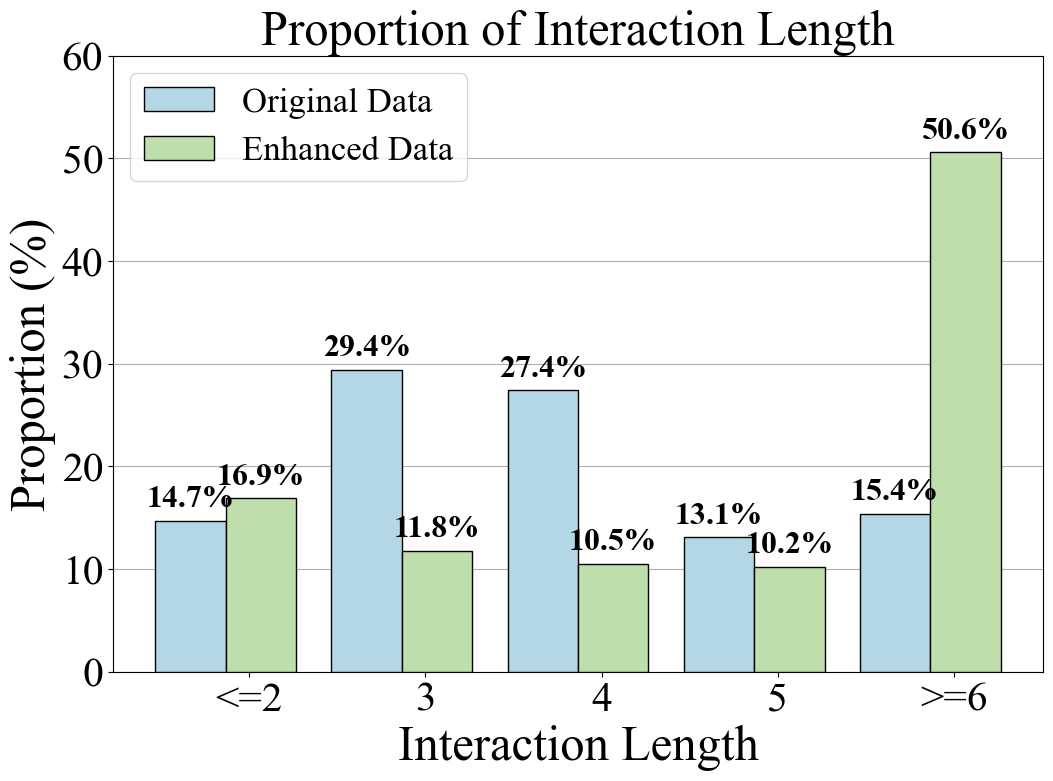

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['<=2', '3', '4', '5', '>=6']

# Question Match data
# Each model has three data points: Ans.Q, Amb.Q+ans, Amb.Q+clarify+ans
scores = {
    '<=2': [14.7, 16.9],
    '3': [29.4, 11.8],
    '4': [27.4, 10.5],
    '5': [13.1, 10.2],
    '>=6': [15.4, 50.6],
}

# Set font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 30  # Increase font size

# Plot the chart
fig, ax = plt.subplots(figsize=(12, 8))

# Set the width and positions of the bars
bar_width = 0.4  # Increase bar width
index = np.arange(len(models))

# Get the data for each category
amb_q_ans = [scores[model][0] for model in models]
amb_q_clarify_ans = [scores[model][1] for model in models]

# Plot the bars for each category
bars2 = ax.bar(index, amb_q_ans, bar_width, label='Original Data', color='#b4d7e5', edgecolor='black', zorder=100)
bars3 = ax.bar(index + bar_width, amb_q_clarify_ans, bar_width, label='Enhanced Data', color='#bedeab', edgecolor='black', zorder=100)

# Add text above the bars
for bars in [bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=23, fontweight='bold', zorder=100)

# Set axis labels and title
ax.set_xlabel('Interaction Length', fontsize=35)
ax.set_ylabel('Proportion (%)', fontsize=35)
ax.set_title('Proportion of Interaction Length', fontsize=35)
ax.set_xticks(index + bar_width / 1.2)  # Adjust x-tick positions for wider bars 
ax.set_xticklabels(models, fontsize=30)

# Adjust y-axis limit to make bars shorter
ax.set_ylim(0, 60)

# Place the legend on the left side
ax.legend(fontsize=25, loc='upper left')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)


plt.savefig('plots/InteractionLength.pdf', format='pdf', bbox_inches='tight')


# Show the chart
plt.show()
